In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ML+02+Classification+Employee+Attrition+Dataset.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.sample(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,1,Female,98,3,3,Research Director,4,Single,13458,15146,1,Y,Yes,12,3,3,80,0,15,1,3,15,14,8,12
1250,29,No,Travel_Frequently,461,Research & Development,1,3,Life Sciences,1,1753,4,Male,70,4,2,Healthcare Representative,3,Single,6294,23060,8,Y,Yes,12,3,4,80,0,10,5,4,3,2,0,2
250,37,Yes,Travel_Frequently,504,Research & Development,10,3,Medical,1,342,1,Male,61,3,3,Manufacturing Director,3,Divorced,10048,22573,6,Y,No,11,3,2,80,2,17,5,3,1,0,0,0
234,33,Yes,Travel_Rarely,813,Research & Development,14,3,Medical,1,325,3,Male,58,3,1,Laboratory Technician,4,Married,2436,22149,5,Y,Yes,13,3,3,80,1,8,2,1,5,4,0,4
1142,45,No,Travel_Rarely,1015,Research & Development,5,5,Medical,1,1611,3,Female,50,1,2,Laboratory Technician,1,Single,5769,23447,1,Y,Yes,14,3,1,80,0,10,3,3,10,7,1,4
848,35,No,Travel_Frequently,636,Research & Development,4,4,Other,1,1185,4,Male,47,2,1,Laboratory Technician,4,Married,2376,26537,1,Y,No,13,3,2,80,1,2,2,4,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})

In [10]:
df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

<Axes: >

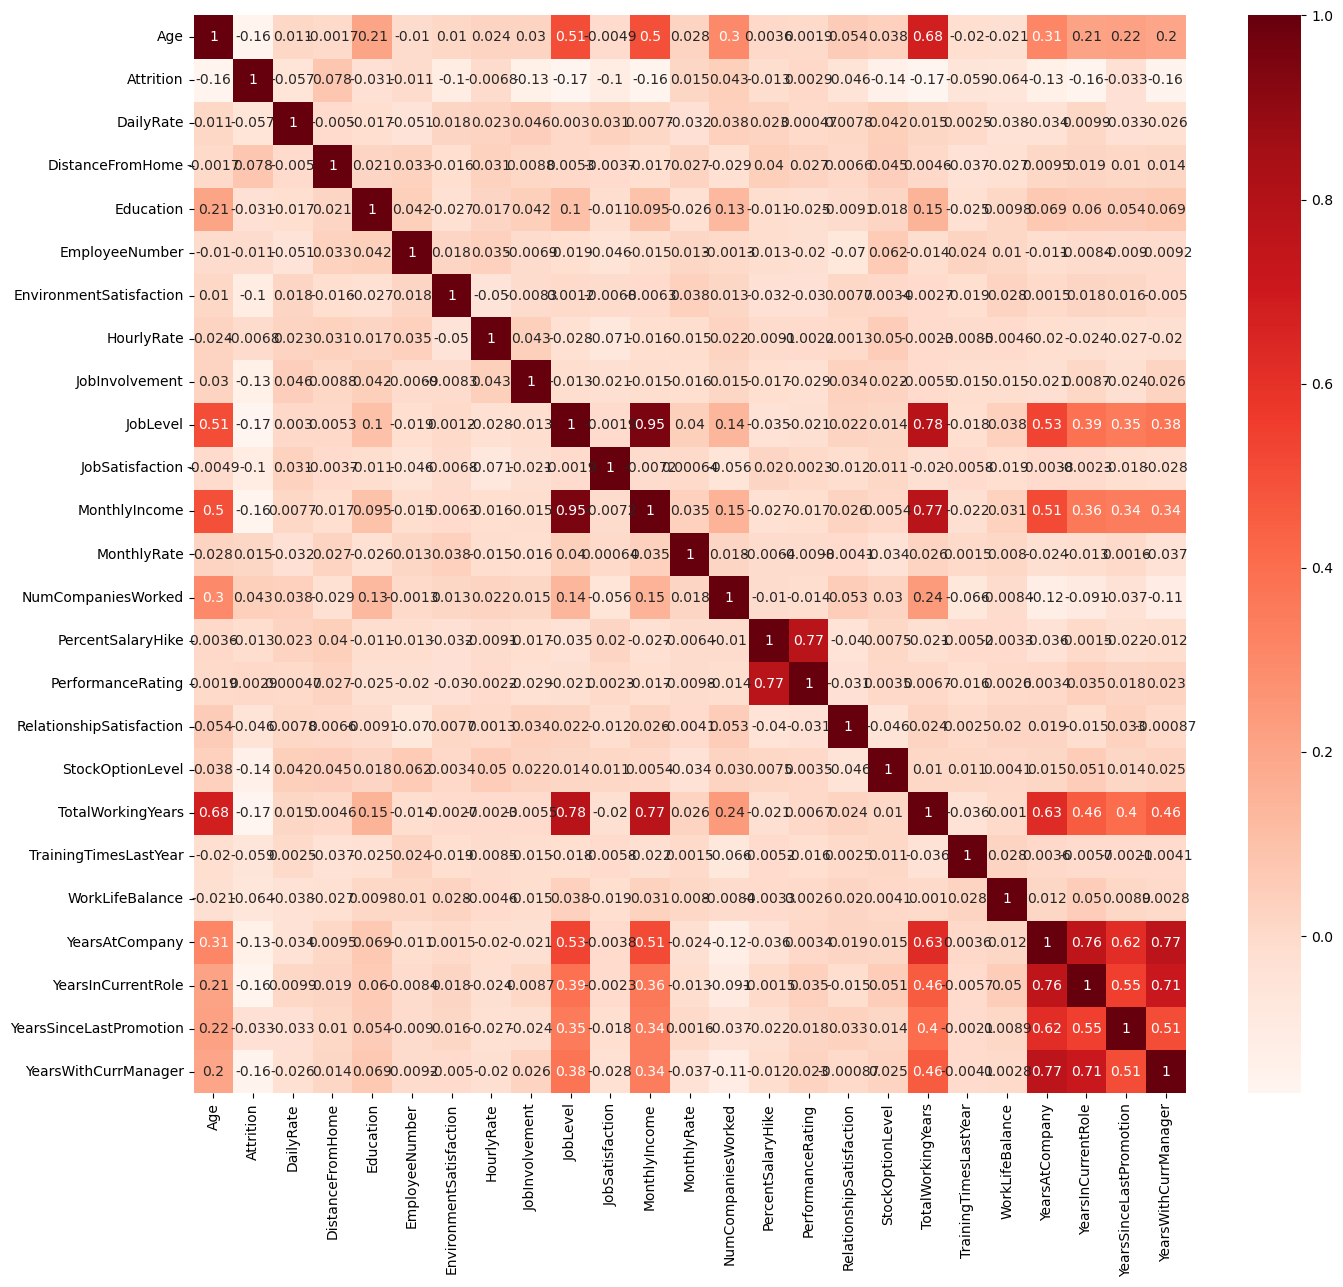

In [11]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [12]:
df['MonthlyIncome']=pd.cut(df['MonthlyIncome'],bins=[800,4000,10000,25000],labels=['low','medium','high'])

In [13]:
df['TotalWorkingYears'] =pd.cut(df['TotalWorkingYears'],bins=[0,5,10,17,45],labels=['low','medium','high','very high'])

In [14]:
df['TrainingTimesLastYear']= pd.cut(df['TrainingTimesLastYear'],bins=[0,2,3,6],labels=['less','medium','high'])

In [15]:
df['YearsAtCompany']= pd.cut(df['YearsAtCompany'],bins=[0,2,5,10,45],labels=['new comer','familier','medium','old'])

In [16]:
df['YearsInCurrentRole']= pd.cut(df['YearsInCurrentRole'],bins=[0,2,6,20],labels=['new','experienced','highly experienced'])

In [17]:
df['YearsSinceLastPromotion'] = pd.cut(df['YearsSinceLastPromotion'],bins=[0,2,17],labels=['recently promoted','promoted'])

In [18]:
df['YearsWithCurrManager']= pd.cut(df['YearsWithCurrManager'],bins=[0,2,18],labels=['new','old'])

In [19]:
df_num= df.select_dtypes(include=['number'])
df_cat= df.select_dtypes(exclude=['number'])

In [20]:
df_dummies= pd.get_dummies(df_cat,drop_first=True)

In [21]:
df_new=pd.concat([df_num,df_dummies],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df

""


In [23]:
vif_df['feature']= df_new.columns

In [24]:
vif_df['VIF'] = [variance_inflation_factor(df_new.values,i) for i in range(len(df_new.columns))]
vif_df

,feature,VIF
0,Age,33.159371
1,Attrition,1.626073
2,DailyRate,5.087199
3,DistanceFromHome,2.376188
4,Education,9.955279
5,EmployeeNumber,4.008293
6,EnvironmentSatisfaction,7.457945
7,HourlyRate,11.649800
8,JobInvolvement,15.953689
9,JobLevel,34.014465


In [25]:
df_new= df_new.drop(['PerformanceRating'],axis=1)

In [26]:
df_new= df_new.drop(['Department_Research & Development'],axis=1)

In [27]:
df_new= df_new.drop(['JobLevel'],axis=1)

In [28]:
df_new= df_new.drop(['Department_Sales'],axis=1)

<Axes: >

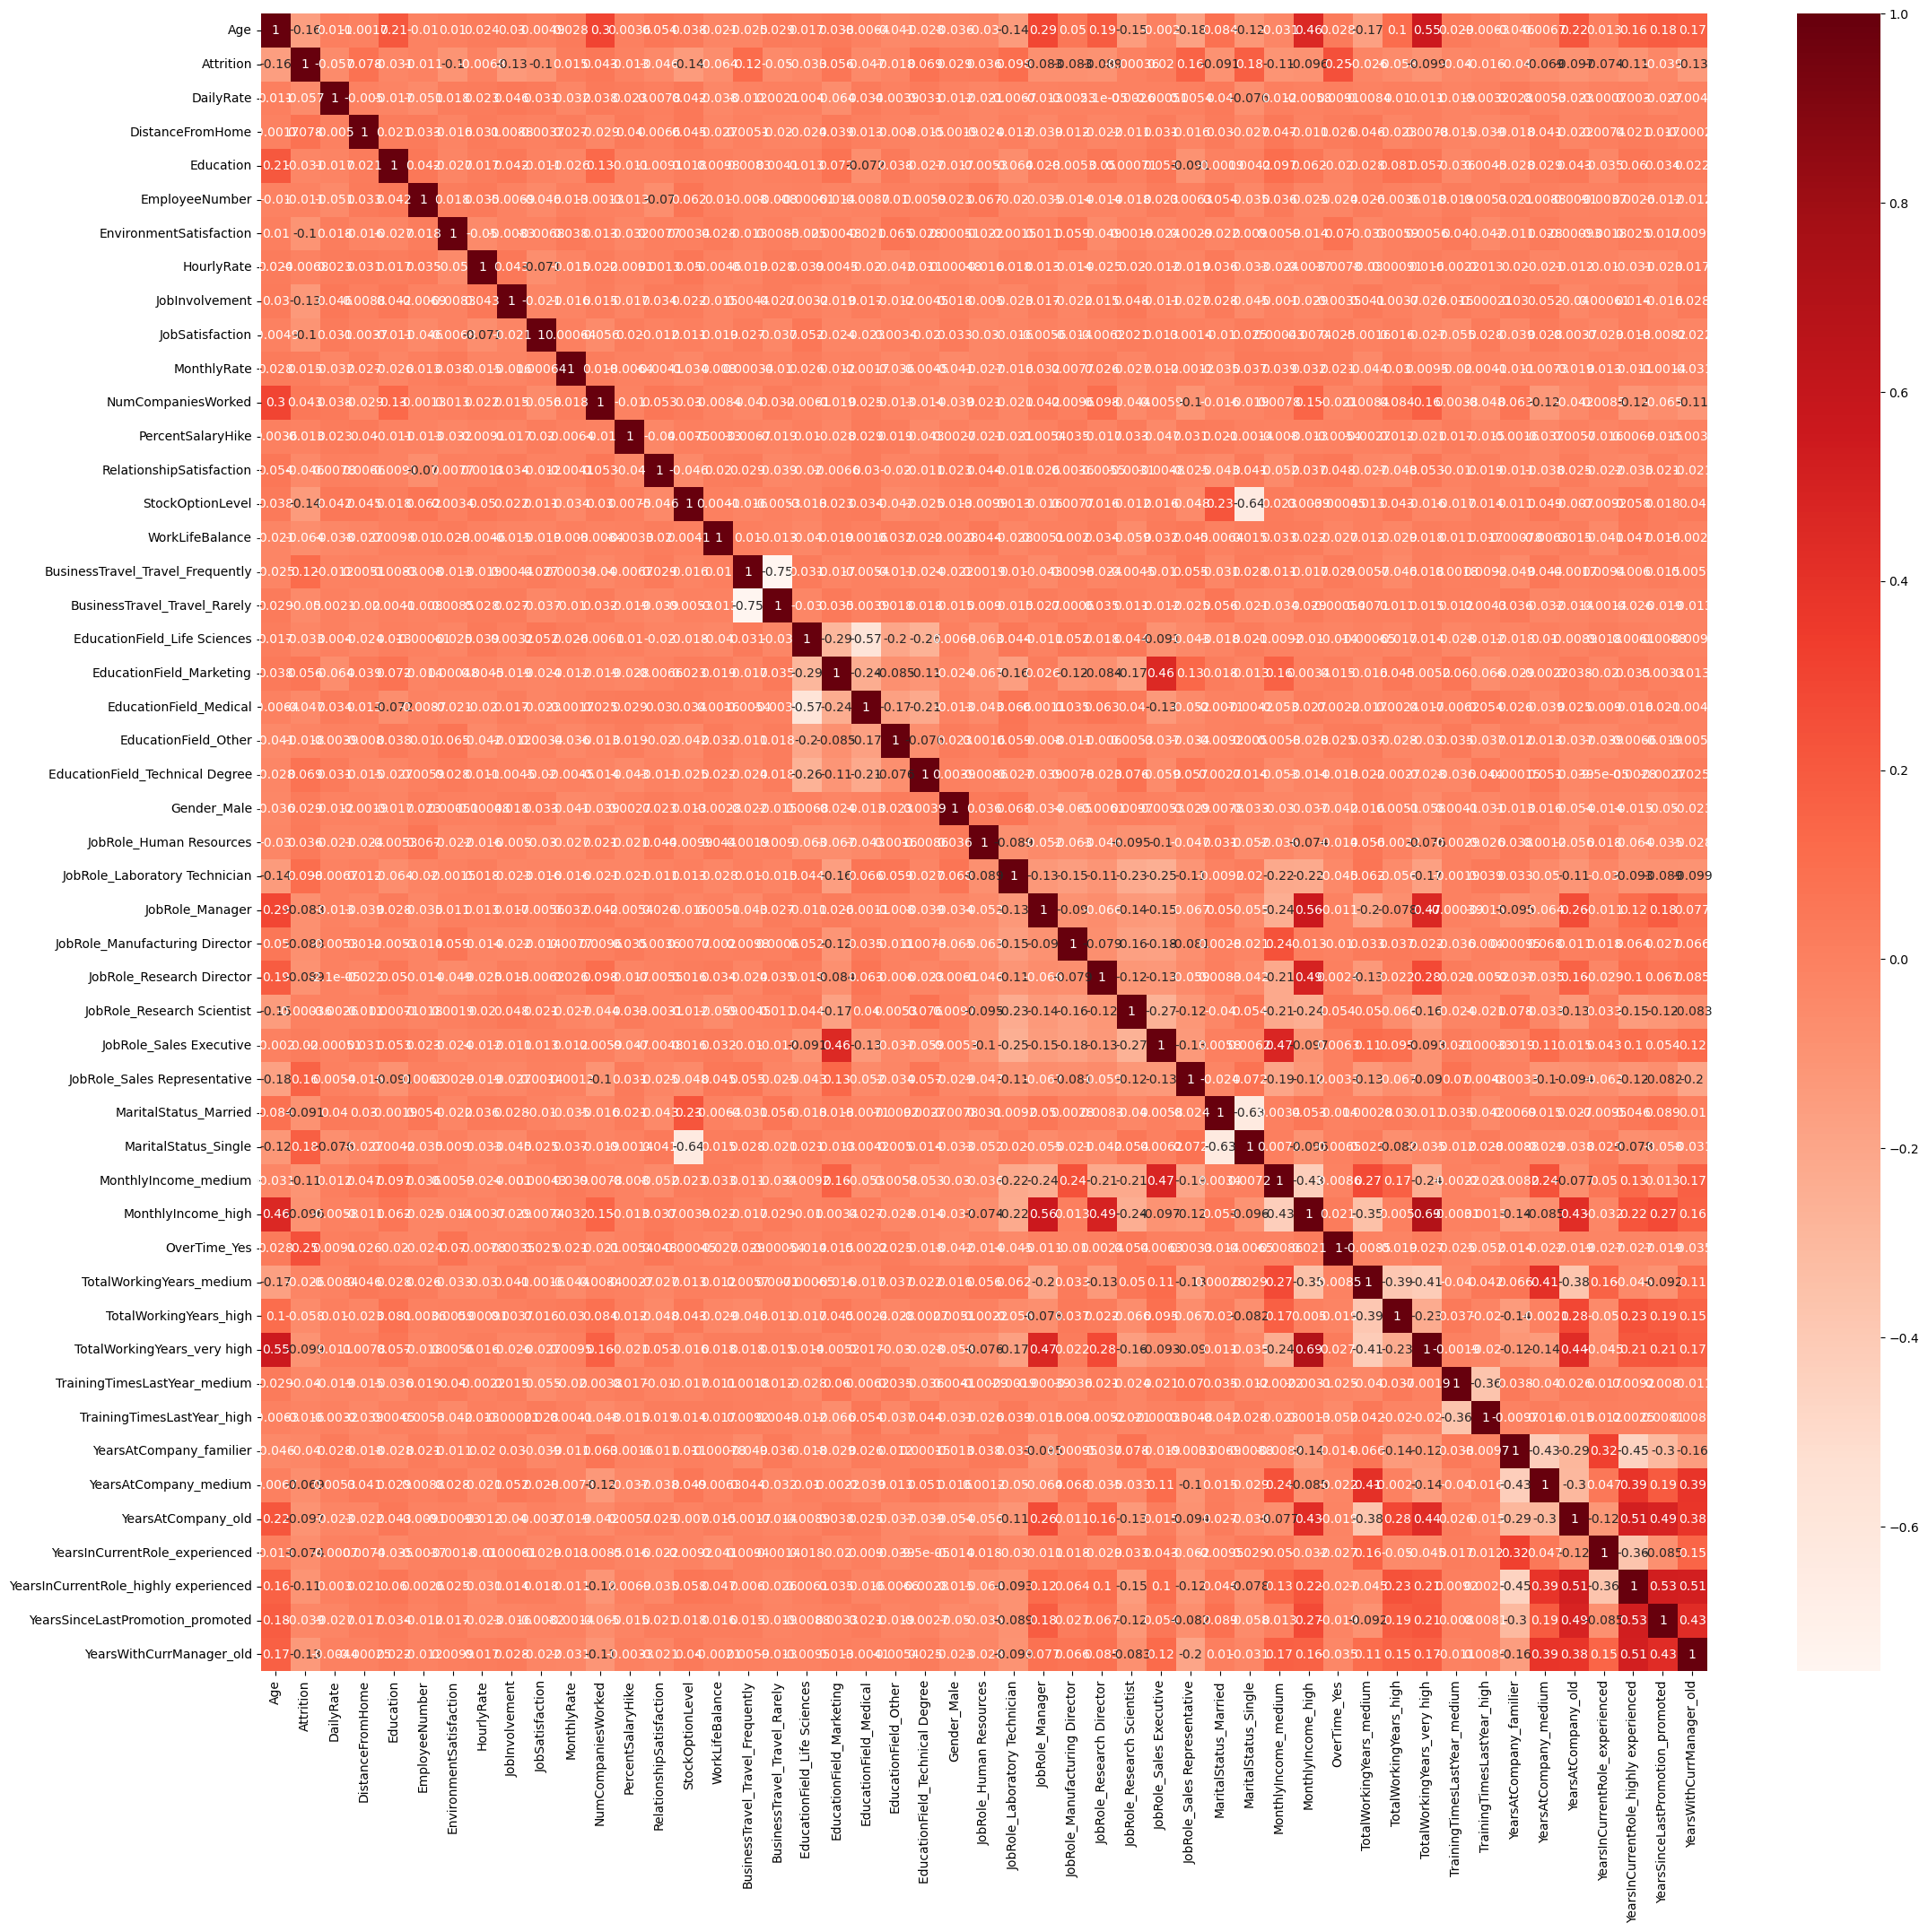

In [29]:
plt.figure(figsize=(26,24))
sns.heatmap(df_new.corr(),annot=True,cmap='Reds')

In [30]:
x= df_new.drop(['Attrition'],axis=1)

In [31]:
y = df_new['Attrition']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=5)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train1= scaler.transform(x_train)
x_test1 = scaler.transform(x_test)

In [52]:
x_train1

array([[-0.08270191, -0.21752343, -0.49160089, ..., -0.69765727,
        -0.57996865, -1.08525471],
       [-0.9749721 , -0.82813821, -0.24084286, ..., -0.69765727,
        -0.57996865,  0.92144268],
       [ 2.03643977,  0.09529152, -0.86773795, ..., -0.69765727,
        -0.57996865,  0.92144268],
       ...,
       [-1.19803964, -0.28759398, -0.86773795, ..., -0.69765727,
        -0.57996865, -1.08525471],
       [-1.64417473,  0.8460474 , -0.49160089, ..., -0.69765727,
        -0.57996865, -1.08525471],
       [ 1.47877091,  1.55926548, -0.86773795, ..., -0.69765727,
        -0.57996865, -1.08525471]])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train1,y_train)

KNeighborsClassifier()

In [54]:
y_pred = classifier.predict(x_test1)
y_pred1 = classifier.predict(x_train1)

In [55]:
from sklearn.metrics import accuracy_score
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('Train Accuracy:', accuracy_score(y_train,y_pred1))

Test Accuracy: 0.8299319727891157
Train Accuracy: 0.875


In [56]:
params = { 
      'n_neighbors':[2,3,4,5,7,9,8,10],
       'weights':['uniform','distance'],
       'algorithm':['auto'],
        'p':[1,2],
         'metric':['minkowski']}

In [57]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = params,
                          cv=4,n_jobs=1,verbose=1,scoring ='accuracy')
grid_search.fit(x_train1,y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto'], 'metric': ['minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 7, 9, 8, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [58]:
print("Best Parameters:",grid_search.best_params_)
print("Best_Score:",grid_search.best_score_)

Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best_Score: 0.8579931972789115


In [61]:
classifier = KNeighborsClassifier(algorithm= 'auto', metric= 'minkowski', n_neighbors= 8, p= 1, weights= 'distance')
classifier.fit(x_train1,y_train)
y_pred = classifier.predict(x_test1)
y_pred1 = classifier.predict(x_train1)

In [62]:
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('Train Accuracy:', accuracy_score(y_train,y_pred1))

Test Accuracy: 0.8299319727891157
Train Accuracy: 1.0
